In [1]:
import matplotlib.pyplot as plt
import math

In [2]:
def nCr(n,r):
    prod = 1
    for i in range(r):
        prod *= (n-i)/(r-i)
    return prod

In [3]:
def binomial_pdf(n,p):
    pdf = []
    for r in range(n+1):
        pdf.append(nCr(n,r)*(p**r)*((1-p)**(n-r)))
    return pdf

In [4]:
def binomial_pdf_opt(n,p):
    pdf = [(1-p)**n]
    for r in range(1,n+1):
        pdf.append(pdf[-1]*((n-r+1)/r)*(p/(1-p)))
    return pdf

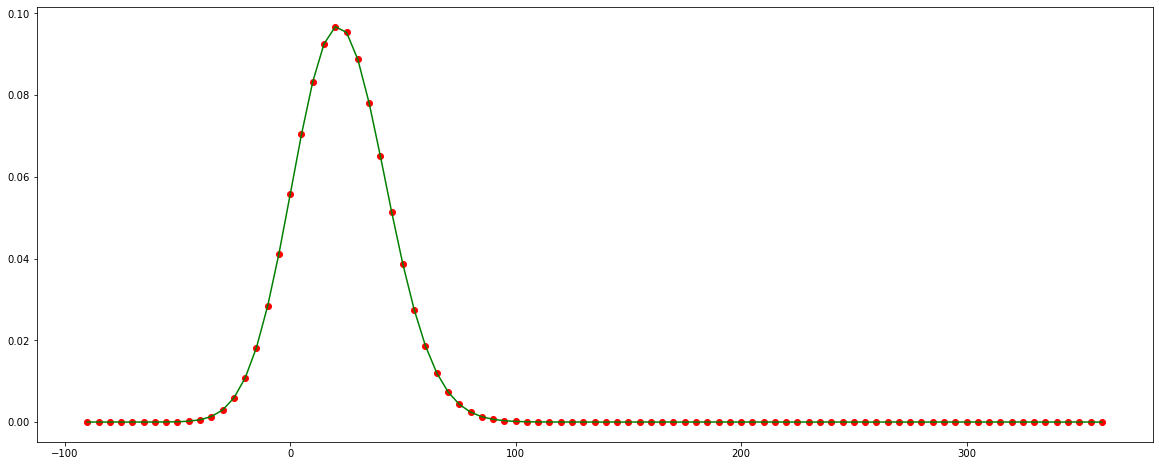

In [5]:
n_ques = 90
n_opts = 4
correct = list(range(n_ques+1))
marks = [4*c-1*(n_ques-c) for c in correct]
probs = binomial_pdf_opt(n_ques,1/n_opts)

plt.figure(figsize=(20,8))
plt.plot(marks,probs,color='green')
plt.scatter(marks,probs,color='red')

In [6]:
prob_negative = 0

for i in range(n_ques+1):
    if(marks[i] < 0):
        prob_negative += probs[i]

In [7]:
print("Probability of getting negative marks is {}".format(round(prob_negative,4)))

Probability of getting negative marks is 0.1095


In [8]:
def get_expectation(vals,probs):
    expectation = 0
    for idx,val in enumerate(vals):
        expectation += val*probs[idx]
    return expectation

In [9]:
def get_variance(vals,probs):
    expectation = get_expectation(vals,probs)
    return get_expectation([val**2 for val in vals],probs)-get_expectation(vals,probs)**2

In [10]:
expectation = get_expectation(marks,probs)
variance = get_variance(marks,probs)
stddev = math.sqrt(variance)

In [11]:
print("Expectation: {} , Stddev: {}".format(round(expectation,4),round(stddev,2)))

Expectation: 22.5 , Stddev: 20.54
